# **Cinemática de un robot planar**

**Docente:** PhD Jorge Rudas

**Diseño de prototipos - 2025 I**

**INFOTEP**

## Importar librerias

In [1]:
import numpy as np
from sympy import*
init_printing()

## Se crean variables simbólicas

In [2]:
## Variables Simbolicas
theta_1 = symbols("theta_1",  real=True)
theta_2 = symbols("theta_2",  real=True)
l_1 = symbols("l_1",  real=True)
l_2 = symbols("l_2",  real=True)

## Transformación desde el estado 0 al estado 1

In [3]:
_0H1 = Matrix([[cos(theta_1), -sin(theta_1), 0, 0], [sin(theta_1), cos(theta_1), 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])

In [4]:
_0H1


⎡cos(θ₁)  -sin(θ₁)  0  0⎤
⎢                       ⎥
⎢sin(θ₁)  cos(θ₁)   0  0⎥
⎢                       ⎥
⎢   0        0      1  0⎥
⎢                       ⎥
⎣   0        0      0  1⎦

## Transformación desde el estado 1 al estado 2

In [5]:
_1H2 = Matrix([[1, 0, 0, l_1], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])

In [6]:
_1H2

⎡1  0  0  l₁⎤
⎢           ⎥
⎢0  1  0  0 ⎥
⎢           ⎥
⎢0  0  1  0 ⎥
⎢           ⎥
⎣0  0  0  1 ⎦

## Transformación desde el estado 2 al estado 3

In [7]:
_2H3 = Matrix([[cos(theta_2), -sin(theta_2), 0, 0], [sin(theta_2), cos(theta_2), 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])

In [8]:
_2H3

⎡cos(θ₂)  -sin(θ₂)  0  0⎤
⎢                       ⎥
⎢sin(θ₂)  cos(θ₂)   0  0⎥
⎢                       ⎥
⎢   0        0      1  0⎥
⎢                       ⎥
⎣   0        0      0  1⎦

## Transformación desde el estado 3 al estado 4

In [9]:
_3H4 = Matrix([[1, 0, 0, l_2], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])

In [10]:
_3H4


⎡1  0  0  l₂⎤
⎢           ⎥
⎢0  1  0  0 ⎥
⎢           ⎥
⎢0  0  1  0 ⎥
⎢           ⎥
⎣0  0  0  1 ⎦

## Composición de cada estado de la cinemática

In [11]:
H = simplify(_0H1@_1H2@_2H3@_3H4)

In [12]:
H

⎡cos(θ₁ + θ₂)  -sin(θ₁ + θ₂)  0  l₁⋅cos(θ₁) + l₂⋅cos(θ₁ + θ₂)⎤
⎢                                                            ⎥
⎢sin(θ₁ + θ₂)  cos(θ₁ + θ₂)   0  l₁⋅sin(θ₁) + l₂⋅sin(θ₁ + θ₂)⎥
⎢                                                            ⎥
⎢     0              0        1               0              ⎥
⎢                                                            ⎥
⎣     0              0        0               1              ⎦

## Posición del efector final

In [13]:
P = H[0:2, 3]

In [14]:
P

⎡l₁⋅cos(θ₁) + l₂⋅cos(θ₁ + θ₂)⎤
⎢                            ⎥
⎣l₁⋅sin(θ₁) + l₂⋅sin(θ₁ + θ₂)⎦

In [15]:
import matplotlib.pyplot as plt
import numpy as np

def dibujar_brazo_mecanico(theta1, theta2, l1, l2):
  """Función para dibujar un brazo mecanico con 2 grados de libertad.

  Parametros:
    theta1: Angulo de la primera articulacion en radianes.
    theta2: Angulo de la segunda articulacion en radianes.
    l1: Longitud del primer extremo
    l2: Longitud del segundo extremo
  """

  # Calculamos la posición del efector final
  x1 = l1 * np.cos(theta1)
  y1 = l1 * np.sin(theta1)
  x2 = x1 + l2 * np.cos(theta1 + theta2)
  y2 = y1 + l2 * np.sin(theta1 + theta2)

  # Dibujando el brazo con lineas y puntos
  plt.figure(figsize=(6, 6))
  plt.plot([0, x1], [0, y1], 'b-', linewidth=5)  # First link
  plt.plot([x1, x2], [y1, y2], 'b-', linewidth=5)  # Second link
  plt.plot(0, 0, 'ro', markersize=10)  # Base
  plt.plot(x2, y2, 'go', markersize=10)  # End-effector

  # Se dibujan los límites y los labels
  plt.xlim([-l1 - l2, l1 + l2])
  plt.ylim([-l1 - l2, l1 + l2])
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title('Brazo robótico')
  plt.grid(True)
  plt.show()

## Ejemplo de manipulación del brazo robotico en su estado final

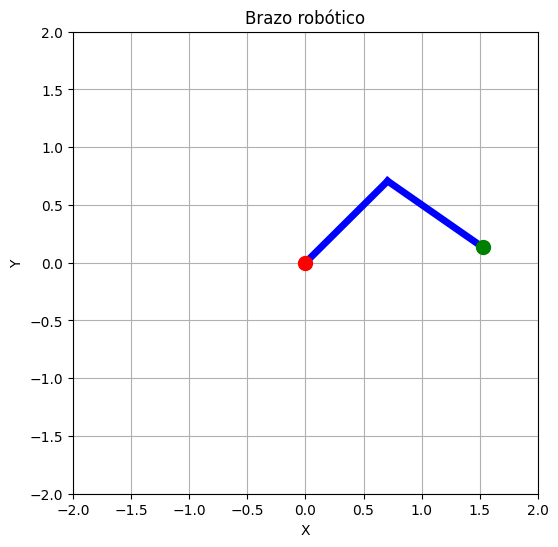

In [16]:
theta1 = np.deg2rad(45)  # 45 grados
theta2 = np.deg2rad(-80)  # -30 grados
l1 = 1
l2 = 1
dibujar_brazo_mecanico(theta1, theta2, l1, l2)

## **Taller**

*  Dibujar cada estado del anterior brazo robótico
*  Imagine un brazo robótico cuyas extremidades miden 2 unidades cada una. Podría este brazo alcanzar cualquier objeto dentro de la cuadricula de 2 x 2? Explique detalladamente su razonamiento

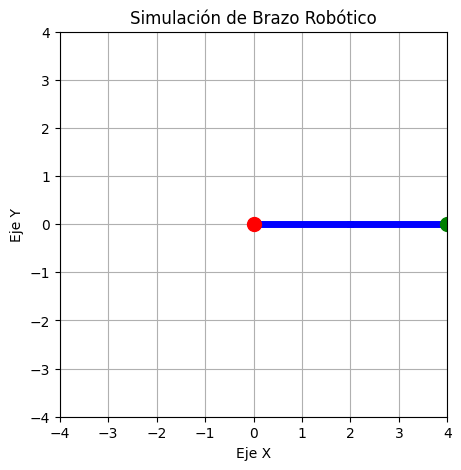

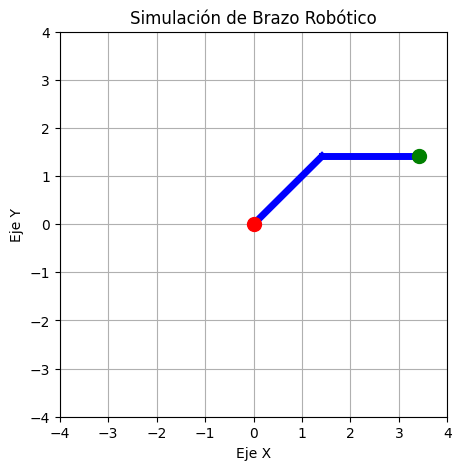

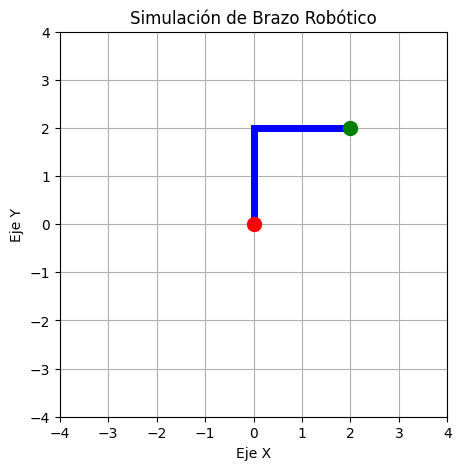

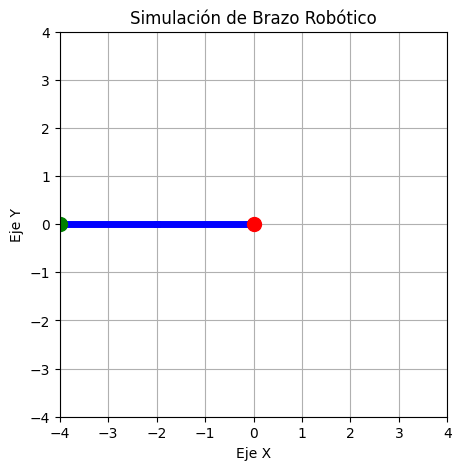

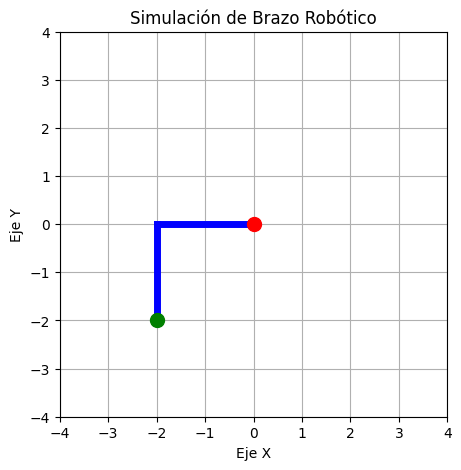

In [89]:
def dibujar_brazo(theta1, theta2, l1, l2):
    # Calculamos las posiciones de las articulaciones
    x1 = l1 * np.cos(theta1)  # Posición X del primer segmento
    y1 = l1 * np.sin(theta1)  # Posición Y del primer segmento

    # Posición final del brazo (extremo)
    x2 = x1 + l2 * np.cos(theta1 + theta2)
    y2 = y1 + l2 * np.sin(theta1 + theta2)

    # Configuramos el gráfico
    plt.figure(figsize=(5, 5))

    # Dibujamos los segmentos del brazo (azul)
    plt.plot([0, x1], [0, y1], 'b-', linewidth=5)  # Primer segmento (base a primera articulación)
    plt.plot([x1, x2], [y1, y2], 'b-', linewidth=5)  # Segundo segmento

    # Marcamos los puntos importantes
    plt.plot(0, 0, 'ro', markersize=10)  # Base (rojo)
    plt.plot(x2, y2, 'go', markersize=10)  # Extremo (verde)

    # Ajustamos los límites del gráfico
    plt.xlim([-l1 - l2, l1 + l2])
    plt.ylim([-l1 - l2, l1 + l2])

    # Etiquetas y título
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    plt.title('Simulación de Brazo Robótico')
    plt.grid(True)
    plt.show()

# Longitudes de los segmentos del brazo
longitud1, longitud2 = 2, 2

# Diferentes configuraciones angulares que probaremos
posiciones = [
    (0, 0),           # Totalmente extendido horizontalmente
    (np.pi/4, -np.pi/4),  # Primer segmento a 45°, segundo a -45°
    (np.pi/2, -np.pi/2),  # Primer segmento vertical, segundo horizontal
    (np.pi, 0),        # Primer segmento horizontal izquierda, segundo extendido
    (np.pi, np.pi/2)   # Primer segmento horizontal izquierda, segundo hacia arriba
]

# Dibujamos el brazo para cada configuración
for angulo1, angulo2 in posiciones:
    dibujar_brazo(angulo1, angulo2, longitud1, longitud2)